In [509]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from dash import Dash, dcc, html, Input, Output


df = None
try:
    df = pd.read_csv("df.csv")
except:
    print("file not exixt")
df = df[df['p99']<=100]
df['p99_log'] = np.log10(df['p99'])
df['slo_vio'] = (df['p99'] <= 1).astype(int)


fig = plt.figure()
fig = px.scatter_3d(df, x='vm_util', y='pkt_util', z='p99',
            color='p99_log',opacity=0.7,color_continuous_scale='bluered')
fig.update_traces(marker_size=1)
fig.update_layout(scene=dict(zaxis=dict(dtick=1, type='log')))




<Figure size 800x550 with 0 Axes>

In [510]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
 
dft = AV.AutoViz(
    filename="",
    dfte=df,
    lowess=False,
    chart_format="html",
    max_rows_analyzed=150000,
    max_cols_analyzed=30
)

Shape of your Data Set loaded: (3082, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Unnamed: 0,3082,int64,0,0.000000,100.000000,0,possible ID column: drop
p99,2927,float64,0,0.000000,94.970798,0,highly skewed: drop outliers or do box-cox transform
p99_log,2927,float64,0,0.000000,94.970798,0,skewed: cap or drop outliers
vm_util,2507,float64,0,0.000000,81.343284,0,
prev_vm_util,2506,float64,0,0.000000,81.310837,0,
prev_pkt_util,1143,float64,0,0.000000,37.086308,0,skewed: cap or drop outliers
pkt_util,1143,float64,0,0.000000,37.086308,0,skewed: cap or drop outliers
prev_pkt_core,10,float64,0,0.000000,0.324465,0,skewed: cap or drop outliers
prev_vm_core,9,float64,0,0.000000,0.292018,0,
vm_core,9,float64,0,0.000000,0.292018,0,


    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
No scatter plots with depVar when no depVar is given.
Saving pair_scatters in HTML format
Saving distplots_nums in HTML format           
Saving violinplots in HTML format             
No date vars could be found in data set
Saving heatmaps in HTML format
Saving cat_var_plots in HTML format
Time to run AutoViz (in seconds) = 19        


In [511]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


def log_transform(x):
    return np.log(x + 1)

transformer = FunctionTransformer(log_transform)
scaler = StandardScaler()

X = df[['vm_util','pkt_util']]
Y = df[['slo_vio']]


In [512]:

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.8, random_state = 42) # train, test 데이터 나누기


In [513]:
reg = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None) # LazyRegressor모델을 생성하고, MAE를 custom_metric에 넣어주기
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models 

100%|██████████| 29/29 [00:02<00:00, 10.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.71,0.55,0.55,0.78,0.02
BaggingClassifier,0.88,0.54,0.54,0.88,0.07
DecisionTreeClassifier,0.85,0.53,0.53,0.86,0.03
XGBClassifier,0.90,0.53,0.53,0.88,0.69
RandomForestClassifier,0.91,0.53,0.53,0.89,0.37
LGBMClassifier,0.90,0.52,0.52,0.88,0.17
ExtraTreeClassifier,0.85,0.52,0.52,0.86,0.02
QuadraticDiscriminantAnalysis,0.92,0.52,0.52,0.89,0.02
PassiveAggressiveClassifier,0.91,0.52,0.52,0.89,0.02


In [1]:
from sklearn.svm import SVR
import plotly.graph_objects as go
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


#clf =  GaussianNB()
clf =  DecisionTreeClassifier(random_state = 1234,max_depth=2, max_features=1,class_weight={0:6,1:1},max_leaf_nodes=3)
scaler = StandardScaler()
pipe = Pipeline(steps=[
    ("preprocessor", scaler),
    ("classifier",clf)
])

"""
pipe = Pipeline(steps=[
    ("regressor", SVR())
])
"""

"""
opt = BayesSearchCV(
    pipe,
    {
        'classifier__C': (1e-1, 1e+1, 'log-uniform'),
        'classifier__gamma': (1e-6, 1e+1, 'log-uniform'),
        'classifier__degree': (1, 8),  # integer valued parameter
        'classifier__kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=8,
    cv=3
)
"""
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
pipe.fit(X_train, y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

#print("val. score: %s" % pipe.best_score_)
print("test score: %s" % pipe.score(X_test, y_test))

expected = y_test
predicted = pipe.predict(X_test)

conf_matrix = classification_report(expected, predicted)
print(conf_matrix)

th = pipe[1].tree_.threshold
feat = pipe[1].tree_.feature
util_th = scaler.inverse_transform([th[:2],[0,0]])
vm_util, pkt_util = [-1, -1]
if feat[0] == 0:
    vm_util,pkt_util = util_th[0]
else:
    pkt_util,vm_util = util_th[0]
print('vm_util: ', vm_util)
print('pkt_util: ',pkt_util)




NameError: name 'pd' is not defined

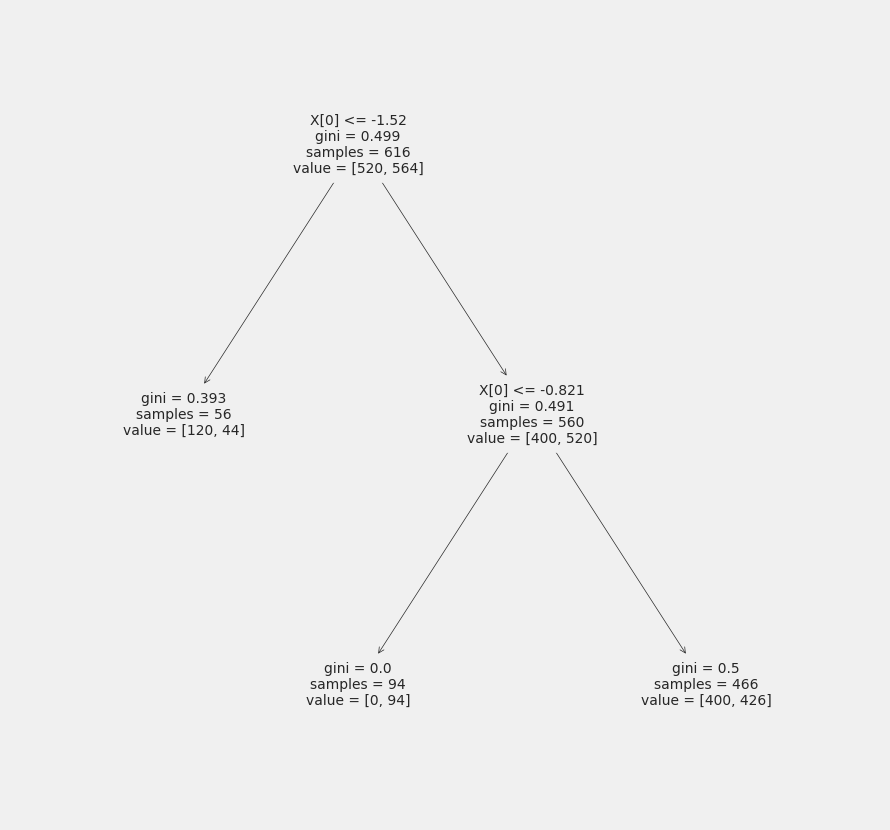

In [ ]:
from sklearn import tree


fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)
plt.show()


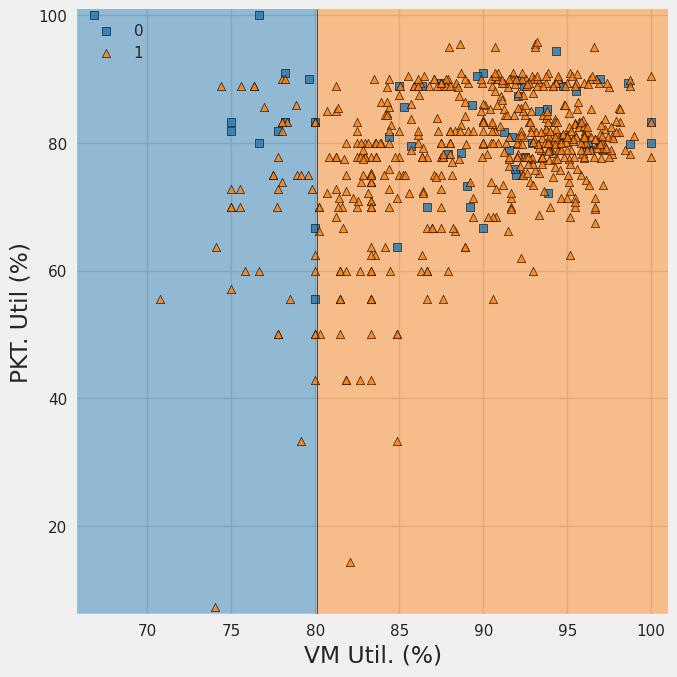

In [ ]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_train.to_numpy(), y_train['slo_vio'].to_numpy(), clf=pipe)
plt.xlabel('VM Util. (%)')
plt.ylabel('PKT. Util (%)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

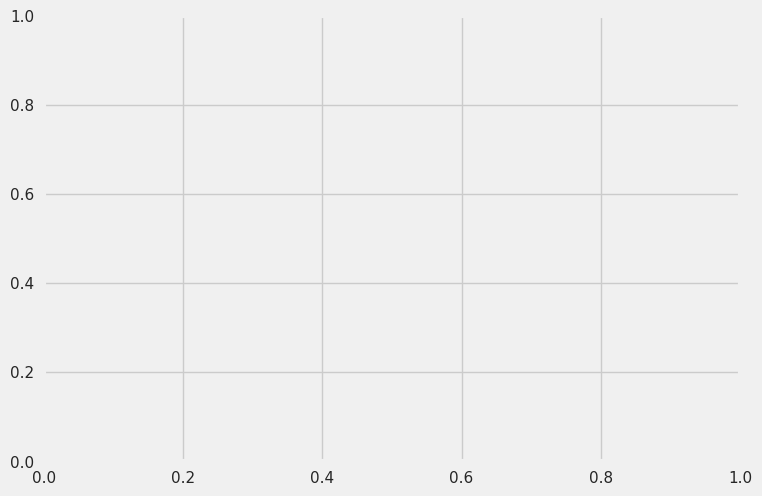

<Figure size 800x550 with 0 Axes>

In [ ]:

mesh_size = 10
xrange = np.arange(0,101,mesh_size)
yrange = np.arange(0,101,mesh_size)
xx, yy =np.meshgrid(xrange, yrange)


#run model
pred = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.cla()
fig = plt.figure()
fig = px.scatter(df, x='vm_util', y='pkt_util',
            color='slo_vio',opacity=0.7,color_continuous_scale='bluered')
fig.update_traces(marker_size=5)
#fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
trace3 = go.Heatmap(x=xx[0], y=yrange, 
                    z=pred,
                    colorscale='Viridis',
                    showscale=True)

fig.add_trace(trace3)
fig.show()
